In [11]:
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

## Load in the dataset CSV

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/Imageomics/HDR-anomaly-challenge/refs/heads/main/files/butterfly_anomaly_train.csv")
df.head()

,CAMID,file_url,hybrid_stat,split,zenodo_link,md5,subspecies,parent_subspecies_1,parent_subspecies_2,filename
0,CAM017821,https://zenodo.org/record/1748277/files/CAM017...,hybrid,train,https://zenodo.org/record/1748277,ba38c61337e2d720f5f72451387d4a48,NaN,8.0,9.0,CAM017821.jpg
1,CAM017820,https://zenodo.org/record/1748277/files/CAM017...,hybrid,train,https://zenodo.org/record/1748277,9a2ff257a0ad17055eae3cc6c279a62b,NaN,8.0,9.0,CAM017820.jpg
2,CAM017693,https://zenodo.org/record/1748277/files/CAM017...,hybrid,train,https://zenodo.org/record/1748277,c314eec15bb53750bdd68595d95a5e93,NaN,8.0,9.0,CAM017693.jpg
3,CAM018291,https://zenodo.org/record/2548678/files/CAM018...,non-hybrid,train,https://zenodo.org/record/2548678,e3a7bf83bdb9f11c035873a623a31345,8.0,NaN,NaN,CAM018291.jpg
4,CAM011430,https://zenodo.org/record/2550097/files/CAM011...,non-hybrid,train,https://zenodo.org/record/2550097,5060c653aea379c72802aa3ef8af32b0,9.0,NaN,NaN,CAM011430.jpg


## Make one column with classification

This is the subspecies (which may is a mix of two for some specimens, the hybrids); this is for coloring the distribution plot by hybrid status and showing all together.

In [13]:
for camid in list(df.loc[df["subspecies"].isna(), "CAMID"]):
    temp = df.loc[df["CAMID"] == camid]
    subspecies = temp["parent_subspecies_1"].astype(str) + " and " + temp["parent_subspecies_2"].astype(str)
    df.loc[df["CAMID"] == camid, "classification"] = subspecies
for camid in list(df.loc[df["subspecies"].notna(), "CAMID"]):
    temp = df.loc[df["CAMID"] == camid]
    subspecies = temp["subspecies"].astype(str)
    df.loc[df["CAMID"] == camid, "classification"] = subspecies

In [14]:
df.head()

,CAMID,file_url,hybrid_stat,split,zenodo_link,md5,subspecies,parent_subspecies_1,parent_subspecies_2,filename,classification
0,CAM017821,https://zenodo.org/record/1748277/files/CAM017...,hybrid,train,https://zenodo.org/record/1748277,ba38c61337e2d720f5f72451387d4a48,NaN,8.0,9.0,CAM017821.jpg,8.0 and 9.0
1,CAM017820,https://zenodo.org/record/1748277/files/CAM017...,hybrid,train,https://zenodo.org/record/1748277,9a2ff257a0ad17055eae3cc6c279a62b,NaN,8.0,9.0,CAM017820.jpg,8.0 and 9.0
2,CAM017693,https://zenodo.org/record/1748277/files/CAM017...,hybrid,train,https://zenodo.org/record/1748277,c314eec15bb53750bdd68595d95a5e93,NaN,8.0,9.0,CAM017693.jpg,8.0 and 9.0
3,CAM018291,https://zenodo.org/record/2548678/files/CAM018...,non-hybrid,train,https://zenodo.org/record/2548678,e3a7bf83bdb9f11c035873a623a31345,8.0,NaN,NaN,CAM018291.jpg,8.0
4,CAM011430,https://zenodo.org/record/2550097/files/CAM011...,non-hybrid,train,https://zenodo.org/record/2550097,5060c653aea379c72802aa3ef8af32b0,9.0,NaN,NaN,CAM011430.jpg,9.0


## Get distribution of images by subspecies (colored by hybrid status)

<Axes: xlabel='Count', ylabel='classification'>

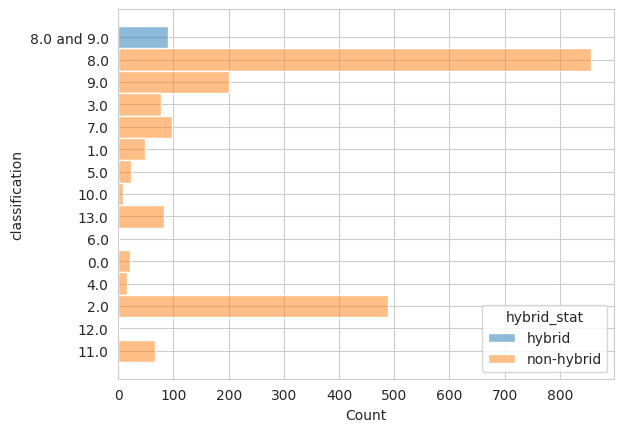

In [5]:
sns.histplot(df, y = "classification", hue = "hybrid_stat")

## Create sample subset of data for example

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Get stratified 15% of the training images for sample run (should take about 12 minutes to download),
# update "test_size" to select more or less sample images.
df_set, df_sample = train_test_split(df, test_size = .15, stratify = df["classification"], random_state = 614)

df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, 1722 to 1780
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CAMID                313 non-null    object 
 1   file_url             313 non-null    object 
 2   hybrid_stat          313 non-null    object 
 3   split                313 non-null    object 
 4   zenodo_link          313 non-null    object 
 5   md5                  313 non-null    object 
 6   subspecies           299 non-null    float64
 7   parent_subspecies_1  14 non-null     float64
 8   parent_subspecies_2  14 non-null     float64
 9   filename             313 non-null    object 
 10  classification       313 non-null    object 
dtypes: float64(3), object(8)
memory usage: 29.3+ KB


## Download Data

In [17]:
from cautiousrobot.__main__ import download_images
from cautiousrobot.buddy_check import BuddyCheck
from sumbuddy import get_checksums

Download images and validate the download. Note that these will work in one step run in the command line with the following code:
```
cautious-robot -i <path/to/butterfly_anomaly_train.csv> -o <path/to/images> -s hybrid_stat -l 256 -v md5
```
where `<path/to/images>` is `sample_images`.

In [18]:
# set paths
IMG_DIR = "sample_images"
CHECKSUM_PATH = "sample_images_checksums"

In [19]:
download_images(df_sample,
                img_dir = IMG_DIR,
                log_filepath = "sample_img_logs",
                error_log_filepath = "sample_img_error_logs",
                # subfolders = "hybrid_stat",
                downsample_path = "sample_images_downsized",
                downsample = 256
)

100%|██████████| 313/313 [09:02<00:00,  1.73s/it]


In [20]:
# Get checksums of downloaded images
get_checksums(input_path = IMG_DIR,
              output_filepath = CHECKSUM_PATH
              )
        
# verify numbers
checksum_df = pd.read_csv(CHECKSUM_PATH, low_memory = False)
expected_num_imgs = df_sample.shape[0]
print(f"{checksum_df.shape[0]} images were downloaded to {IMG_DIR} of the {expected_num_imgs} expected.")

Calculating md5 checksums on sample_images:   0%|          | 0/313 [00:00<?, ?it/s]

Calculating md5 checksums on sample_images: 100%|██████████| 313/313 [00:03<00:00, 80.35it/s]

md5 checksums for sample_images written to sample_images_checksums
313 images were downloaded to sample_images of the 313 expected.


In [21]:
# Check for all expected image match
buddy_check = BuddyCheck(buddy_id = "filename", buddy_col = "md5")
missing_imgs = buddy_check.validate_download(source_df = df_sample,
                                        checksum_df = checksum_df,
                                        source_validation_col = "md5")
if missing_imgs is not None:
    missing_imgs.to_csv("samples_missing.csv", index = False)
    print(f"See samples_missing.csv for missing image info and check logs.")
else:
    print(f"Buddy check successful. All {expected_num_imgs} expected images accounted for.")

merging on checksums and IDs
Buddy check successful. All 313 expected images accounted for.


In [ ]:
# Save the sample annotation
df_sample.to_csv('./sample_annotation.csv')